<img src="../images/burger_equation1.png" width="35%">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preprocessing part

In [2]:
nt = 500
nx = 51
ny = 51

nu = 0.1
dt = 0.001

dx = 2 / (nx - 1)  # length = 2
dy = 2 / (ny - 1)

In [3]:
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

In [4]:
x

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ])

In [5]:
grid = np.zeros((nx, ny))
grid.shape

(51, 51)

In [7]:
# just initialize
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))

un = np.zeros((nx, ny))
vn = np.zeros((nx, ny))

# placeholder for our all computation (t, x, y)
uf = np.zeros((nt, nx, ny))
vf = np.zeros((nt, nx, ny))

u.shape, v.shape, un.shape, vn.shape, uf.shape, vf.shape

((51, 51), (51, 51), (51, 51), (51, 51), (500, 51, 51), (500, 51, 51))

In [8]:
# initial condiitons
# change u, v and uf, vf according to initial conditions
u = np.ones((nx, ny))  
v = np.ones((nx, ny))

uf = np.ones((nt, nx, ny))
vf = np.ones((nt, nx, ny))

# initial conditions everywhere equal to 1.0, except following area:
# where IC equal to 5.
u[int(0.75/dx):int(1.25/dx + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
v[int(0.75/dx):int(1.25/dx + 1), int(0.75/dy):int(1.25/dy + 1)] = 5

uf[0, int(0.75/dx):int(1.25/dx + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
vf[0, int(0.75/dx):int(1.25/dx + 1), int(0.75/dy):int(1.25/dy + 1)] = 5


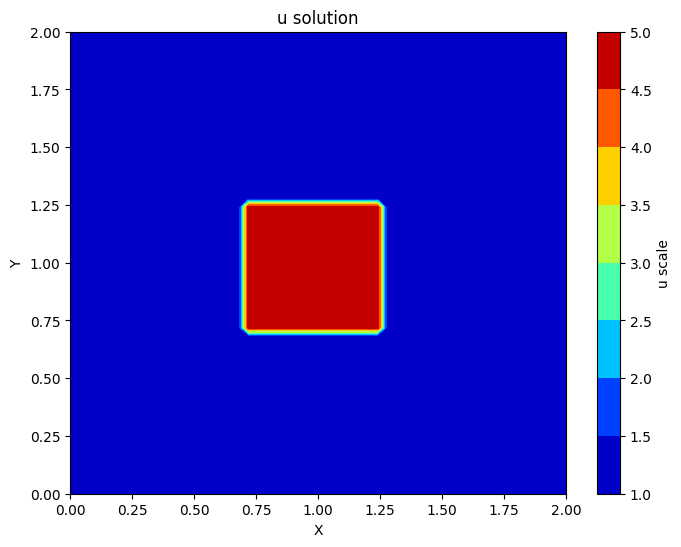

In [31]:
# visualize IC for 'u'

X, Y = np.meshgrid(x, y) 

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('u scale')
plt.show()

In [32]:
X.shape, Y.shape

((51, 51), (51, 51))

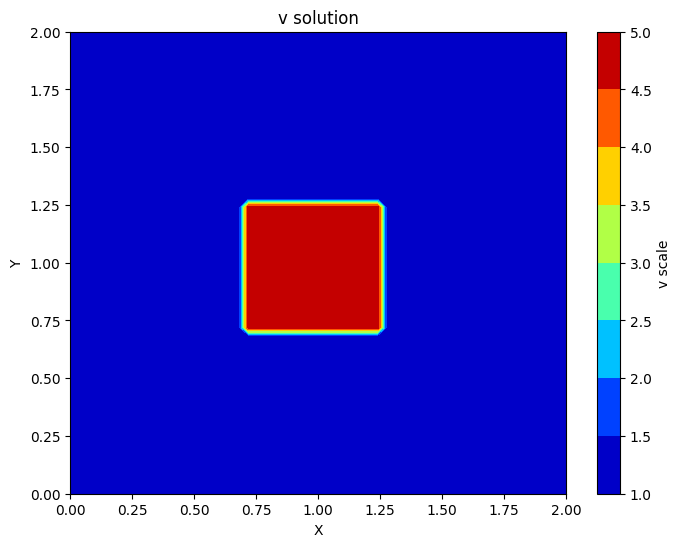

In [33]:
# visualize IC for 'v'

X, Y = np.meshgrid(x, y) 

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('v scale')
plt.show()

In [43]:
# Set the BC

u[:, 0] = 1  # left
u[:, -1] = 1 # right
u[0, :] = 1 # bottom
u[-1, :] = 1 # up
v[:, 0] = 1  # left
v[:, -1] = 1 # right
v[0, :] = 1 # bottom
v[-1, :] = 1 # up

uf[0, :, 0] = 1  # left
uf[0, :, -1] = 1 # right
uf[0, 0, :] = 1 # bottom
uf[0, -1, :] = 1 # up
vf[0, :, 0] = 1  # left
vf[0, :, -1] = 1 # right
vf[0, 0, :] = 1 # bottom
vf[0, -1, :] = 1 # up

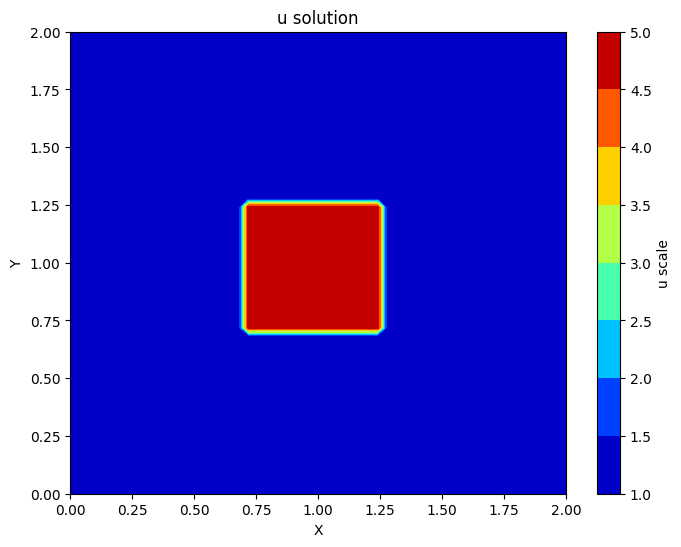

In [44]:
# visualize with IC and BC for 'u'

X, Y = np.meshgrid(x, y) 

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('u scale')
plt.show()

## 2. Solving the equation

In [45]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # central difference scheme
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dy**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dy**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n, i, j] = u[i, j]
            vf[n, i, j] = v[i, j]
    # BC
    u[:, 0] = 1  # left
    u[:, -1] = 1 # right
    u[0, :] = 1 # bottom
    u[-1, :] = 1 # up
    v[:, 0] = 1  # left
    v[:, -1] = 1 # right
    v[0, :] = 1 # bottom
    v[-1, :] = 1 # up
            


## 3. Post processing (Visualization)

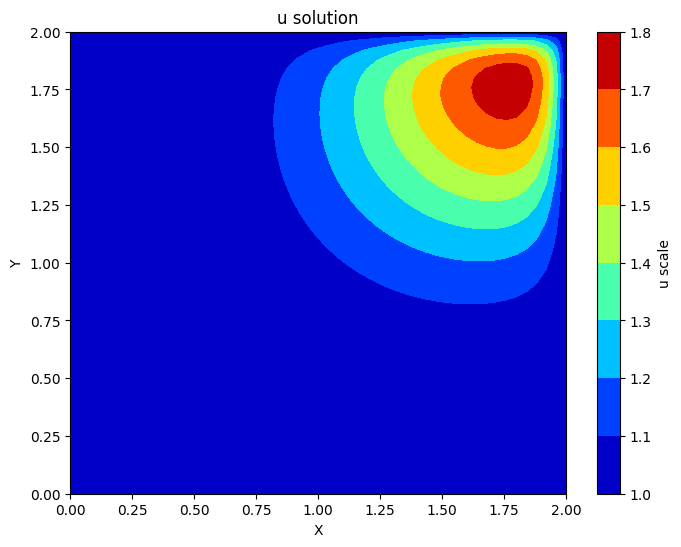

In [46]:
X, Y = np.meshgrid(x, y) 

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('u scale')
plt.show()

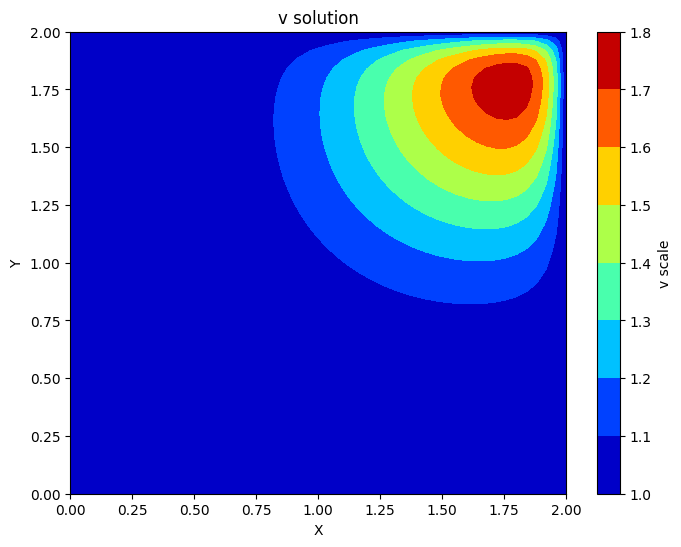

In [47]:
X, Y = np.meshgrid(x, y) 

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('v scale')
plt.show()

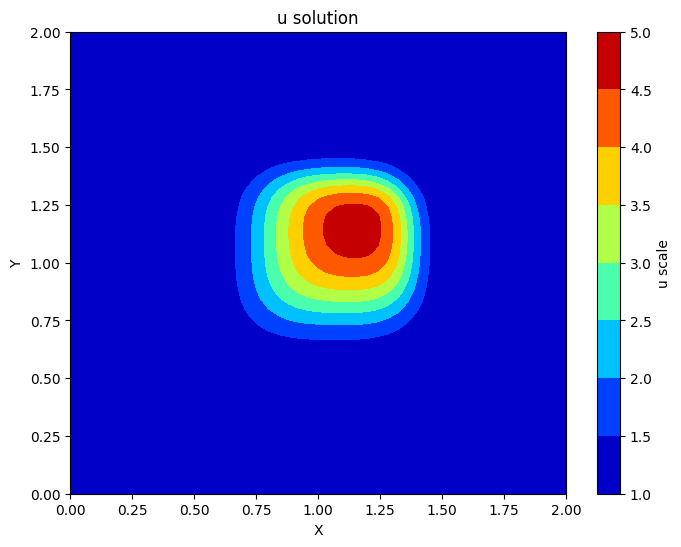

In [61]:
X, Y = np.meshgrid(x, y) 

# set the time as you like
u = uf[40, :, :]

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar()  # visualize
colorbar.set_label('u scale')
plt.show()

In [68]:
# %matplotlib notebook

# from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt

# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 100  
# plt.rcParams['animation.embed_limit'] = 50.0  # Set the limit to 50 MB
# plt.ioff()

# fig, ax = plt.subplots(figsize=(8, 6))

# contour = ax.contourf(X, Y, uf[0, :, :], cmap='jet')
# colorbar = fig.colorbar(contour)
# colorbar.set_label('u scale')
# ax.set_title("u solution")
# ax.set_xlabel('X')
# ax.set_ylabel('Y')

# # Функция для обновления графика на каждом кадре анимации
# def animate(i):
#     ax.clear()
#     contour = ax.contourf(X, Y, uf[i, :, :], cmap='jet')
#     ax.set_title(f"u solution at t = {i}")
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     return contour

# ani = FuncAnimation(fig, animate, frames=range(nt), interval=50, blit=False)

# # Display the animation
# ani


In [69]:
# ani.save('2D_burger_u_animation.gif', writer='pillow', fps=50)

In [73]:
# %matplotlib notebook

# from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt

# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 100  
# plt.rcParams['animation.embed_limit'] = 50.0  # Set the limit to 50 MB
# plt.ioff()

# fig, ax = plt.subplots(figsize=(8, 6))

# contour = ax.contourf(X, Y, vf[0, :, :], cmap='jet')
# colorbar = fig.colorbar(contour)
# colorbar.set_label('v scale')
# ax.set_title("v solution")
# ax.set_xlabel('X')
# ax.set_ylabel('Y')

# # Функция для обновления графика на каждом кадре анимации
# def animate(i):
#     ax.clear()
#     contour = ax.contourf(X, Y, vf[i, :, :], cmap='jet')
#     ax.set_title(f"v solution at t = {i}")
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     return contour

# ani = FuncAnimation(fig, animate, frames=range(nt), interval=40, blit=False)

# # Display the animation
# ani


In [74]:
# ani.save('2D_burger_v_animation.gif', writer='pillow', fps=50)